In [88]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import names
import random
import string

mpl.rcParams['axes.labelcolor'] = 'white'
mpl.rcParams['text.color'] = 'white'
mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'
mpl.rcParams['legend.facecolor'] = 'navy'

sns.set_context('talk')
#sns.set_style('darkgrid')

In [5]:
users = [names.get_full_name() for _ in range(1000)]
mail_clients = ['web.de', 'hotmail.de', 'gmx.de', 'gmail.com',]
account_df = pd.DataFrame({'username': users,
                          'email': [f'{u.split(" ")[0]}@{random.choice(mail_clients)}' 
                                    for u in users],
                          'password': [''.join(random.choice(string.ascii_lowercase) for i in range(np.random.randint(4, 10))) for _ in range(len(users))]})

In [10]:
personas = ['Angela', 'Robert', 'Frank', 'Daniela']

account_df['persona'] = np.random.choice(personas, 
                                         size=[len(users),], p=[0.3, 0.5, 0.15, 0.05])
for i, p in enumerate(personas):
    account_df.loc[account_df.persona == p, 'scores'] = np.random.beta(2, 5+i, 
                                                                       size=account_df.persona.value_counts()[p])*10000


In [70]:
rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)*10+500
dates = pd.date_range("1 1 2020", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=personas)
time_df = data.rolling(7).mean()
scores_over_time_df = time_df.stack().reset_index(level=0, drop=True).reset_index()
scores_over_time_df.columns = ['persona', 'clicks']

for i, p in enumerate(personas):
    scores_over_time_df.loc[scores_over_time_df.persona == p, 'score'] = \
        np.random.beta(2, 5+i, size=scores_over_time_df.persona.value_counts()[p])*10000
scores_over_time_df.head(10)

,persona,clicks,score
0,Angela,475.472548,3064.520644
1,Robert,510.518819,2215.967609
2,Frank,508.697303,2808.652965
3,Daniela,525.016692,3038.933825
4,Angela,470.522638,3889.335709
5,Robert,511.549901,1022.351041
6,Frank,508.614693,1976.424180
7,Daniela,524.975202,1603.700743
8,Angela,466.782680,4047.848579
9,Robert,511.616386,1812.127470


In [7]:
account_df[['username', 'email', 'password', 'scores']].head(50)

,username,email,password,scores
0,Emil Zodrow,Emil@web.de,akuwz,5199.591012
1,Richard Rodino,Richard@gmail.com,aporpl,3580.919972
2,Ruth Pinks,Ruth@web.de,tvujlo,1337.377298
3,Donald Butler,Donald@web.de,imvmn,4157.128790
4,Charles Nunemaker,Charles@gmx.de,bkmrlql,5912.818289
5,Ryan Clermont,Ryan@gmail.com,xkqdhzcls,2088.976472
6,Nellie Turner,Nellie@gmx.de,djjdoyawe,2098.292461
7,Nicole Bento,Nicole@gmail.com,czkw,629.695453
8,Carol Barnhill,Carol@gmail.com,nmxpypttq,2242.014665
9,Julia Hittle,Julia@gmail.com,lqbxofn,2593.050328


Text(0.5, 0, 'Score')

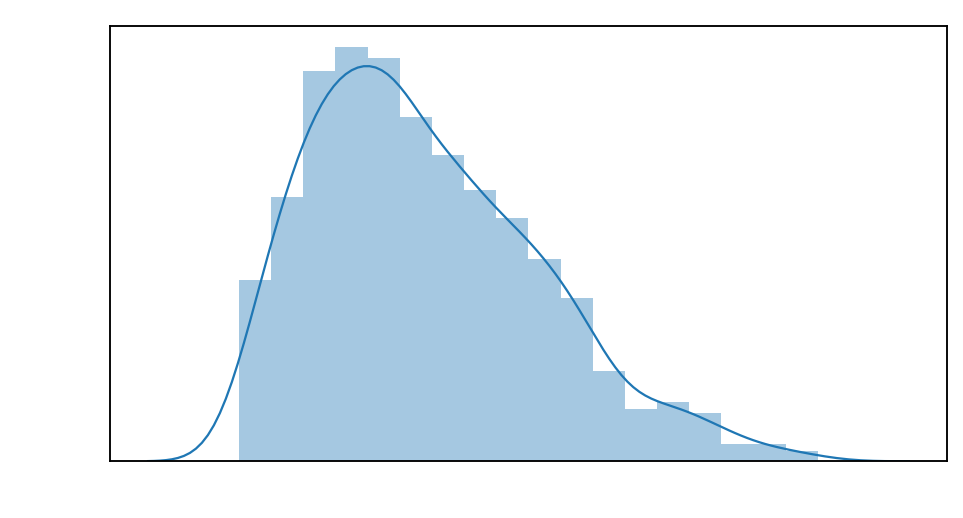

In [92]:
#account_df['scores'].plot.hist(bins=100)
#plt.figure(figsize=(18, 12))
plt.rcParams["figure.figsize"] = (15,8)

#plt.subplot(2,2,1)
sns.distplot(account_df.scores, hist=True)
plt.title('High Score Verteilung')
plt.ylabel('Häufigkeit')
plt.xlabel('Score')

Text(0.5, 1.0, 'Verteilung Personas')

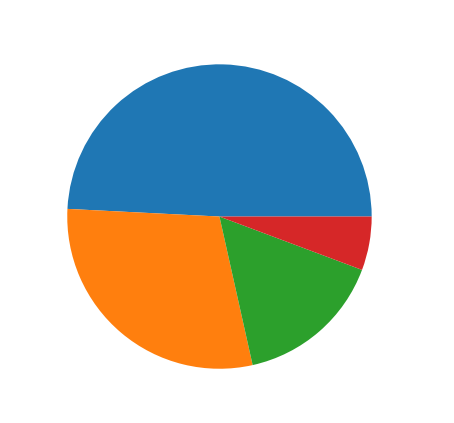

In [93]:
#plt.subplot(2,2,2)
account_df['persona'].value_counts().plot.pie(figsize=(7,7))
plt.title('Verteilung Personas')

Text(0, 0.5, 'Häufigkeit')

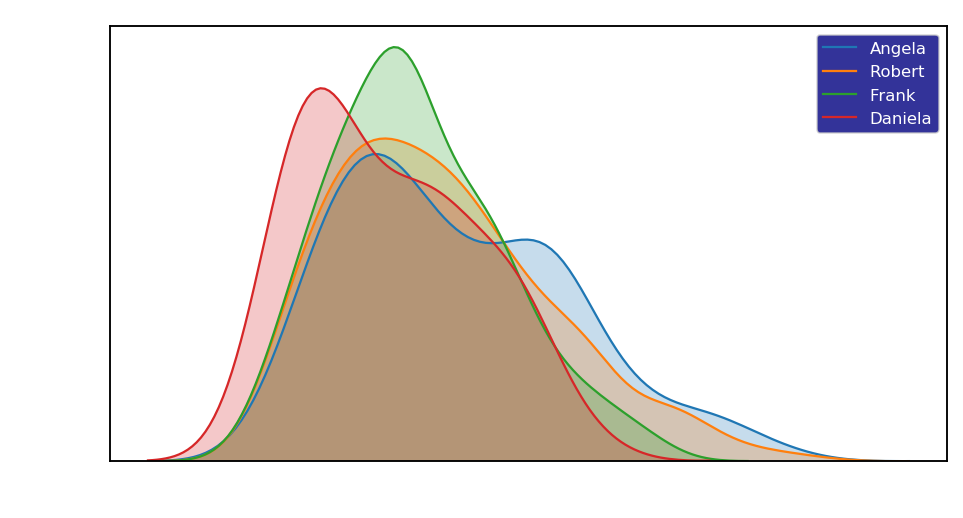

In [94]:
#plt.subplot(2,2,3)
for p in personas:
    sns.kdeplot(account_df[account_df.persona == p].scores, label=p, shade=True)
plt.title('Persona Score Verteilung')
plt.xlabel('Score')
plt.ylabel('Häufigkeit')

Text(0.5, 1.0, 'User Verhalten über Zeit')

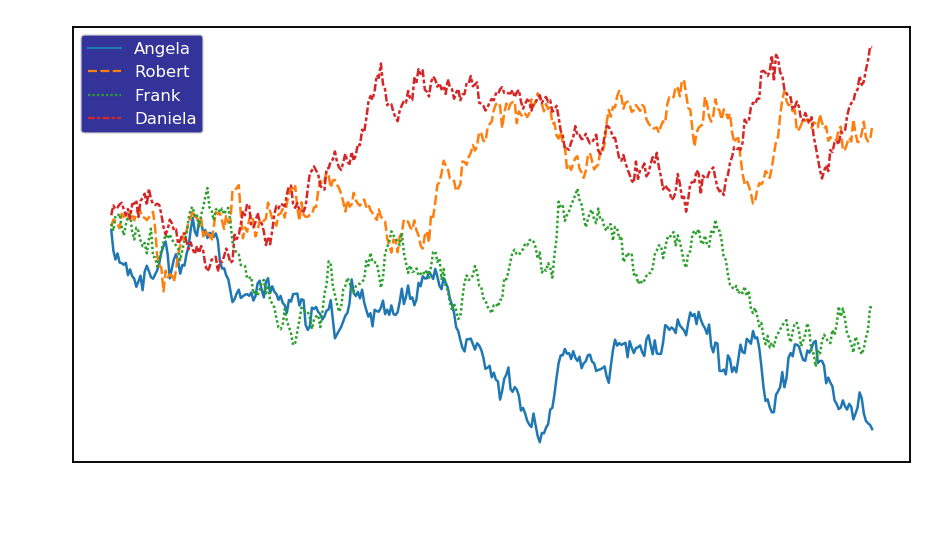

In [95]:
#plt.subplot(2,2,4)
sns.lineplot(data=data, palette="tab10", linewidth=2.5, legend='brief')
plt.xticks(rotation=45)
plt.ylabel('Klicks pro Tag')
plt.title('User Verhalten über Zeit')

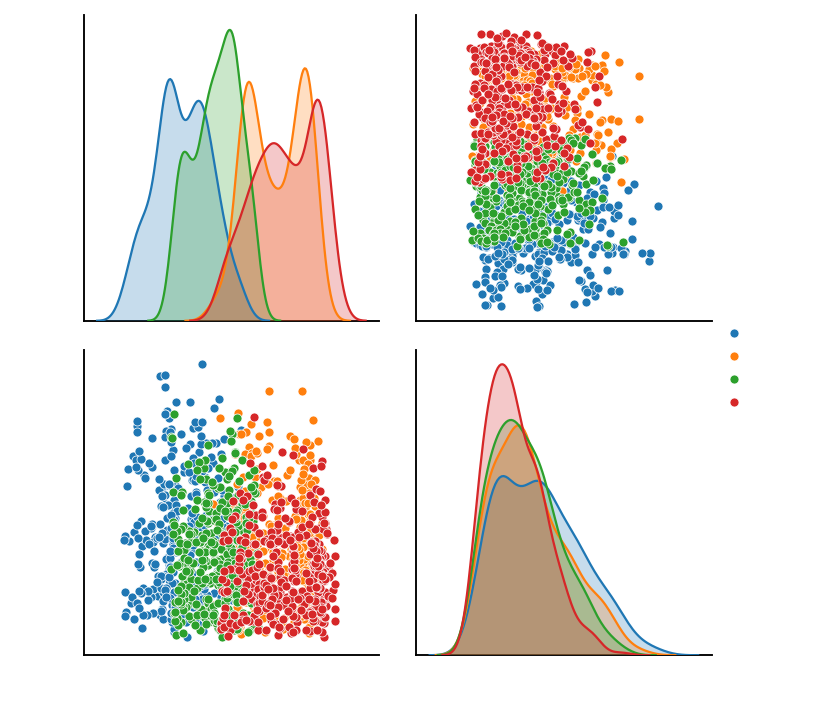

In [80]:
sns.pairplot(scores_over_time_df, hue='persona', height=5, palette='tab10')